In [ ]:

from math import exp


def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return 1.0 / (1.0 + exp(-yhat))

In [ ]:

dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
coef = [-0.406605464, 0.852573316, -1.104746259]
for row in dataset:
	yhat = predict(row, coef)
	print("Expected=%.3f, Predicted=%.3f [%d]" % (row[-1], yhat, round(yhat)))

Expected=0.000, Predicted=0.299 [0]
Expected=0.000, Predicted=0.146 [0]
Expected=0.000, Predicted=0.085 [0]
Expected=0.000, Predicted=0.220 [0]
Expected=0.000, Predicted=0.247 [0]
Expected=1.000, Predicted=0.955 [1]
Expected=1.000, Predicted=0.862 [1]
Expected=1.000, Predicted=0.972 [1]
Expected=1.000, Predicted=0.999 [1]
Expected=1.000, Predicted=0.905 [1]


In [ ]:

def coefficients_sgd(train, l_rate, n_epoch):
	coef = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			yhat = predict(row, coef)
			error = row[-1] - yhat
			sum_error += error**2
			coef[0] = coef[0] + l_rate * error * yhat * (1.0 - yhat)
			for i in range(len(row)-1):
				coef[i + 1] = coef[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return coef

In [ ]:

dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
l_rate = 0.3
n_epoch = 100
coef = coefficients_sgd(dataset, l_rate, n_epoch)
print(coef)

>epoch=0, lrate=0.300, error=2.217
>epoch=1, lrate=0.300, error=1.613
>epoch=2, lrate=0.300, error=1.113
>epoch=3, lrate=0.300, error=0.827
>epoch=4, lrate=0.300, error=0.623
>epoch=5, lrate=0.300, error=0.494
>epoch=6, lrate=0.300, error=0.412
>epoch=7, lrate=0.300, error=0.354
>epoch=8, lrate=0.300, error=0.310
>epoch=9, lrate=0.300, error=0.276
>epoch=10, lrate=0.300, error=0.248
>epoch=11, lrate=0.300, error=0.224
>epoch=12, lrate=0.300, error=0.205
>epoch=13, lrate=0.300, error=0.189
>epoch=14, lrate=0.300, error=0.174
>epoch=15, lrate=0.300, error=0.162
>epoch=16, lrate=0.300, error=0.151
>epoch=17, lrate=0.300, error=0.142
>epoch=18, lrate=0.300, error=0.134
>epoch=19, lrate=0.300, error=0.126
>epoch=20, lrate=0.300, error=0.119
>epoch=21, lrate=0.300, error=0.113
>epoch=22, lrate=0.300, error=0.108
>epoch=23, lrate=0.300, error=0.103
>epoch=24, lrate=0.300, error=0.098
>epoch=25, lrate=0.300, error=0.094
>epoch=26, lrate=0.300, error=0.090
>epoch=27, lrate=0.300, error=0.087
>e

In [ ]:
for row in dataset:
	yhat = predict(row, coef)
	print("Expected=%.3f, Predicted=%.3f [%d]" % (row[-1], yhat, round(yhat)))

Expected=0.000, Predicted=0.092 [0]
Expected=0.000, Predicted=0.020 [0]
Expected=0.000, Predicted=0.004 [0]
Expected=0.000, Predicted=0.055 [0]
Expected=0.000, Predicted=0.054 [0]
Expected=1.000, Predicted=0.990 [1]
Expected=1.000, Predicted=0.932 [1]
Expected=1.000, Predicted=0.997 [1]
Expected=1.000, Predicted=1.000 [1]
Expected=1.000, Predicted=0.954 [1]


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/insurance_data (1).csv")
df.sample(5)

,age,bought_insurance
7,60,1
9,61,1
25,54,1
12,27,0
19,18,0


In [ ]:
df.shape

(27, 2)

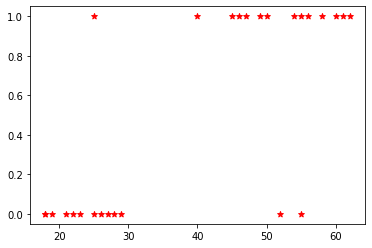

In [ ]:
plt.scatter(df.age,df.bought_insurance,marker='*',color='red')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [ ]:
type(df[['age']])

pandas.core.frame.DataFrame

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
y_predicted

array([0, 0, 1, 0, 0, 1])

In [ ]:
model.predict_proba(X_test)

array([[0.71914491, 0.28085509],
       [0.84929511, 0.15070489],
       [0.08883797, 0.91116203],
       [0.88767065, 0.11232935],
       [0.74133488, 0.25866512],
       [0.13271888, 0.86728112]])

In [ ]:
model.score(X_test,y_test)

1.0

In [ ]:
model.coef_

array([[0.11269416]])

In [ ]:
model.intercept_

array([-4.20835465])

In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
def prediction_function(age):
    z = 0.14911562 * age - 5.10362222 
    y = sigmoid(z)
    return yd

In [ ]:
X_test

,age
13,29
0,22
17,58
18,19
11,28
25,54


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[4, 0],
       [0, 2]])

In [ ]:
df = pd.read_csv("/content/HR_comma_sep (1).csv")

In [ ]:
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14455,0.89,0.86,5,275,5,0,1,0,sales,low
9749,0.59,0.49,4,149,4,0,0,0,support,low
9297,0.90,0.58,3,264,3,0,0,0,IT,medium
4787,0.87,0.90,4,163,2,0,0,0,support,medium
2951,0.80,0.55,2,212,3,0,0,0,support,medium


In [ ]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [ ]:
df = pd.read_csv("/content/salaries.csv")

In [ ]:
inputs = df.drop('salary_more_then_100k',axis='columns')
target = df['salary_more_then_100k']
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [ ]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')

inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [123]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = tree.DecisionTreeClassifier(criterion="entropy")
model.fit(inputs_n, target)


DecisionTreeClassifier(criterion='entropy')

In [124]:
model.score(inputs_n,target)


1.0

In [125]:
model.predict([[2,1,0]])


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [126]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus


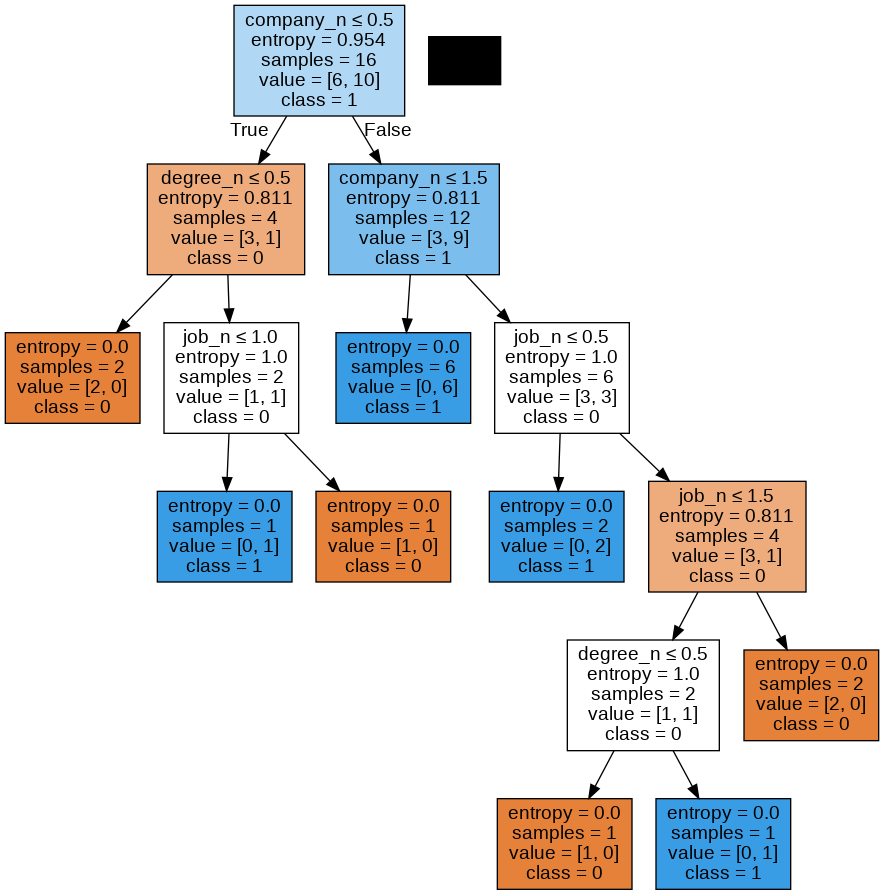

In [127]:
dot_data=StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=False, special_characters=True, feature_names=['company_n', 'job_n', 'degree_n'], class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [128]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1
